In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# ============================================
# Data Science with Python Internship – Task 2
# Titanic Dataset Analysis
# ============================================

# -----------------------------
# STEP 1: Import Required Libraries
# -----------------------------
import pandas as pd              # For data handling
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns            # For advanced visualization

# Set seaborn style for better plots
sns.set(style="whitegrid")

COLOR_PALETTE = sns.color_palette("pastel")

In [25]:
# -----------------------------
# STEP 2: Load Titanic Dataset
# -----------------------------
# Make sure 'train.csv' is in the same folder as this notebook
df = pd.read_csv("Titanic-Dataset.csv")

# Display first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# -----------------------------
# STEP 3: Understand the Dataset
# -----------------------------

# Basic information about dataset
df.info()

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
# -----------------------------
# STEP 4: Check Missing Values
# -----------------------------
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
# -----------------------------
# STEP 5: Data Cleaning
# -----------------------------

# Fill missing Age values with median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Verify missing values again
df.isnull().sum()

C:\Users\Mansi\AppData\Local\Temp\ipykernel_6508\954702418.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


C:\Users\Mansi\AppData\Local\Temp\ipykernel_6508\3776127084.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Mansi\AppData\Local\Temp\ipykernel_6508\3776127084.py:16: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(


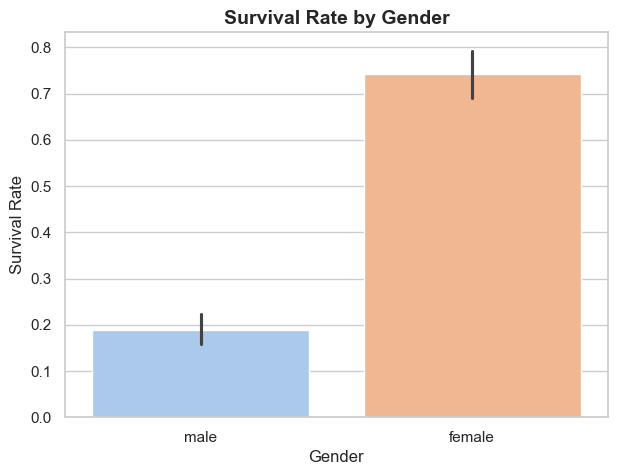

In [29]:
# -----------------------------
# STEP 6: Survival Analysis
# -----------------------------

# ---------------------------------
# Question 1: Who survived more?
# Male or Female?
# ---------------------------------

# Calculate survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean()
print(gender_survival)

# Visualization: Survival by Gender
plt.figure(figsize=(7,5))
sns.barplot(
    x='Sex',
    y='Survived',
    data=df,
    palette=COLOR_PALETTE
)

plt.title("Survival Rate by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.show()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


C:\Users\Mansi\AppData\Local\Temp\ipykernel_6508\4266830195.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass',
C:\Users\Mansi\AppData\Local\Temp\ipykernel_6508\4266830195.py:12: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x='Pclass',


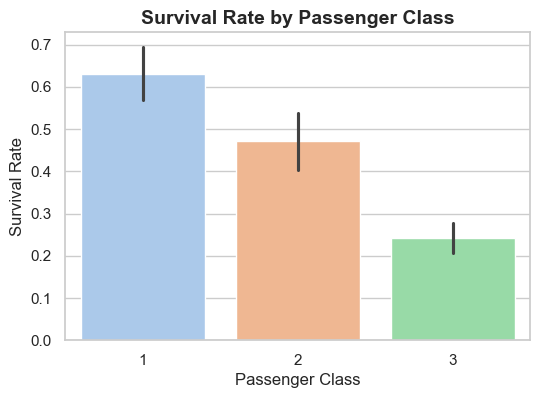

In [30]:
# ---------------------------------
# Question 2: Did Passenger Class
# affect survival chances?
# ---------------------------------

# Calculate survival rate by passenger class
class_survival = df.groupby('Pclass')['Survived'].mean()
print(class_survival)

# Visualization: Survival by Class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', 
            y='Survived', 
            data=df,
            palette=COLOR_PALETTE)
plt.title("Survival Rate by Passenger Class",fontsize=14, fontweight='bold')
plt.ylabel("Survival Rate", fontsize=12)
plt.xlabel("Passenger Class", fontsize=12)
plt.show()


In [31]:
# ---------------------------------
# Question 3: Survival Rate by Age Group
# ---------------------------------

# Create age groups
bins = [0, 12, 18, 40, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate survival rate by age group
agegroup_survival = df.groupby('AgeGroup')['Survived'].mean()
print(agegroup_survival)

AgeGroup
Child          0.579710
Teen           0.428571
Adult          0.360465
Middle Aged    0.390625
Senior         0.227273
Name: Survived, dtype: float64


C:\Users\Mansi\AppData\Local\Temp\ipykernel_6508\2448257474.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_survival = df.groupby('AgeGroup')['Survived'].mean()


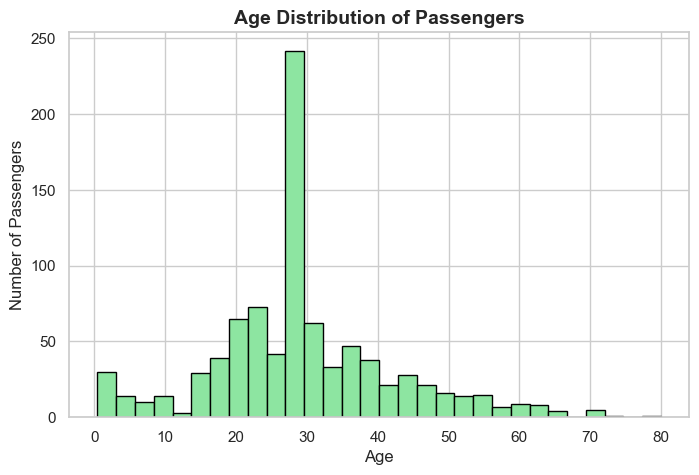

In [40]:
# -----------------------------
# STEP 7: Age Distribution
# -----------------------------

# Histogram of passenger ages
plt.figure(figsize=(8,5))
plt.hist(df['Age'], 
         bins=30,
         edgecolor='black' ,
         color=COLOR_PALETTE[2]
         )
plt.title("Age Distribution of Passengers", fontsize=14, fontweight='bold')
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Passengers",fontsize=12)
plt.show()


In [ ]:
# -----------------------------
# STEP 8: Final Conclusion
# -----------------------------
"""
Observations:
1. Females had a much higher survival rate than males.
2. Passengers in 1st class survived more than those in 2nd and 3rd class.
3. Children had higher survival rates compared to adults.
4. Age, gender, and passenger class played an important role in survival.

This analysis fulfills all requirements of Internship Task 2.
"""

'\nObservations:\n1. Females had a much higher survival rate than males.\n2. Passengers in 1st class survived more than those in 2nd and 3rd class.\n3. Children had higher survival rates compared to adults.\n4. Age, gender, and passenger class played an important role in survival.\n\nThis analysis fulfills all requirements of Internship Task 2.\n'